In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading data from .csv file
data = np.genfromtxt('spectroscopy data.csv', delimiter=',')

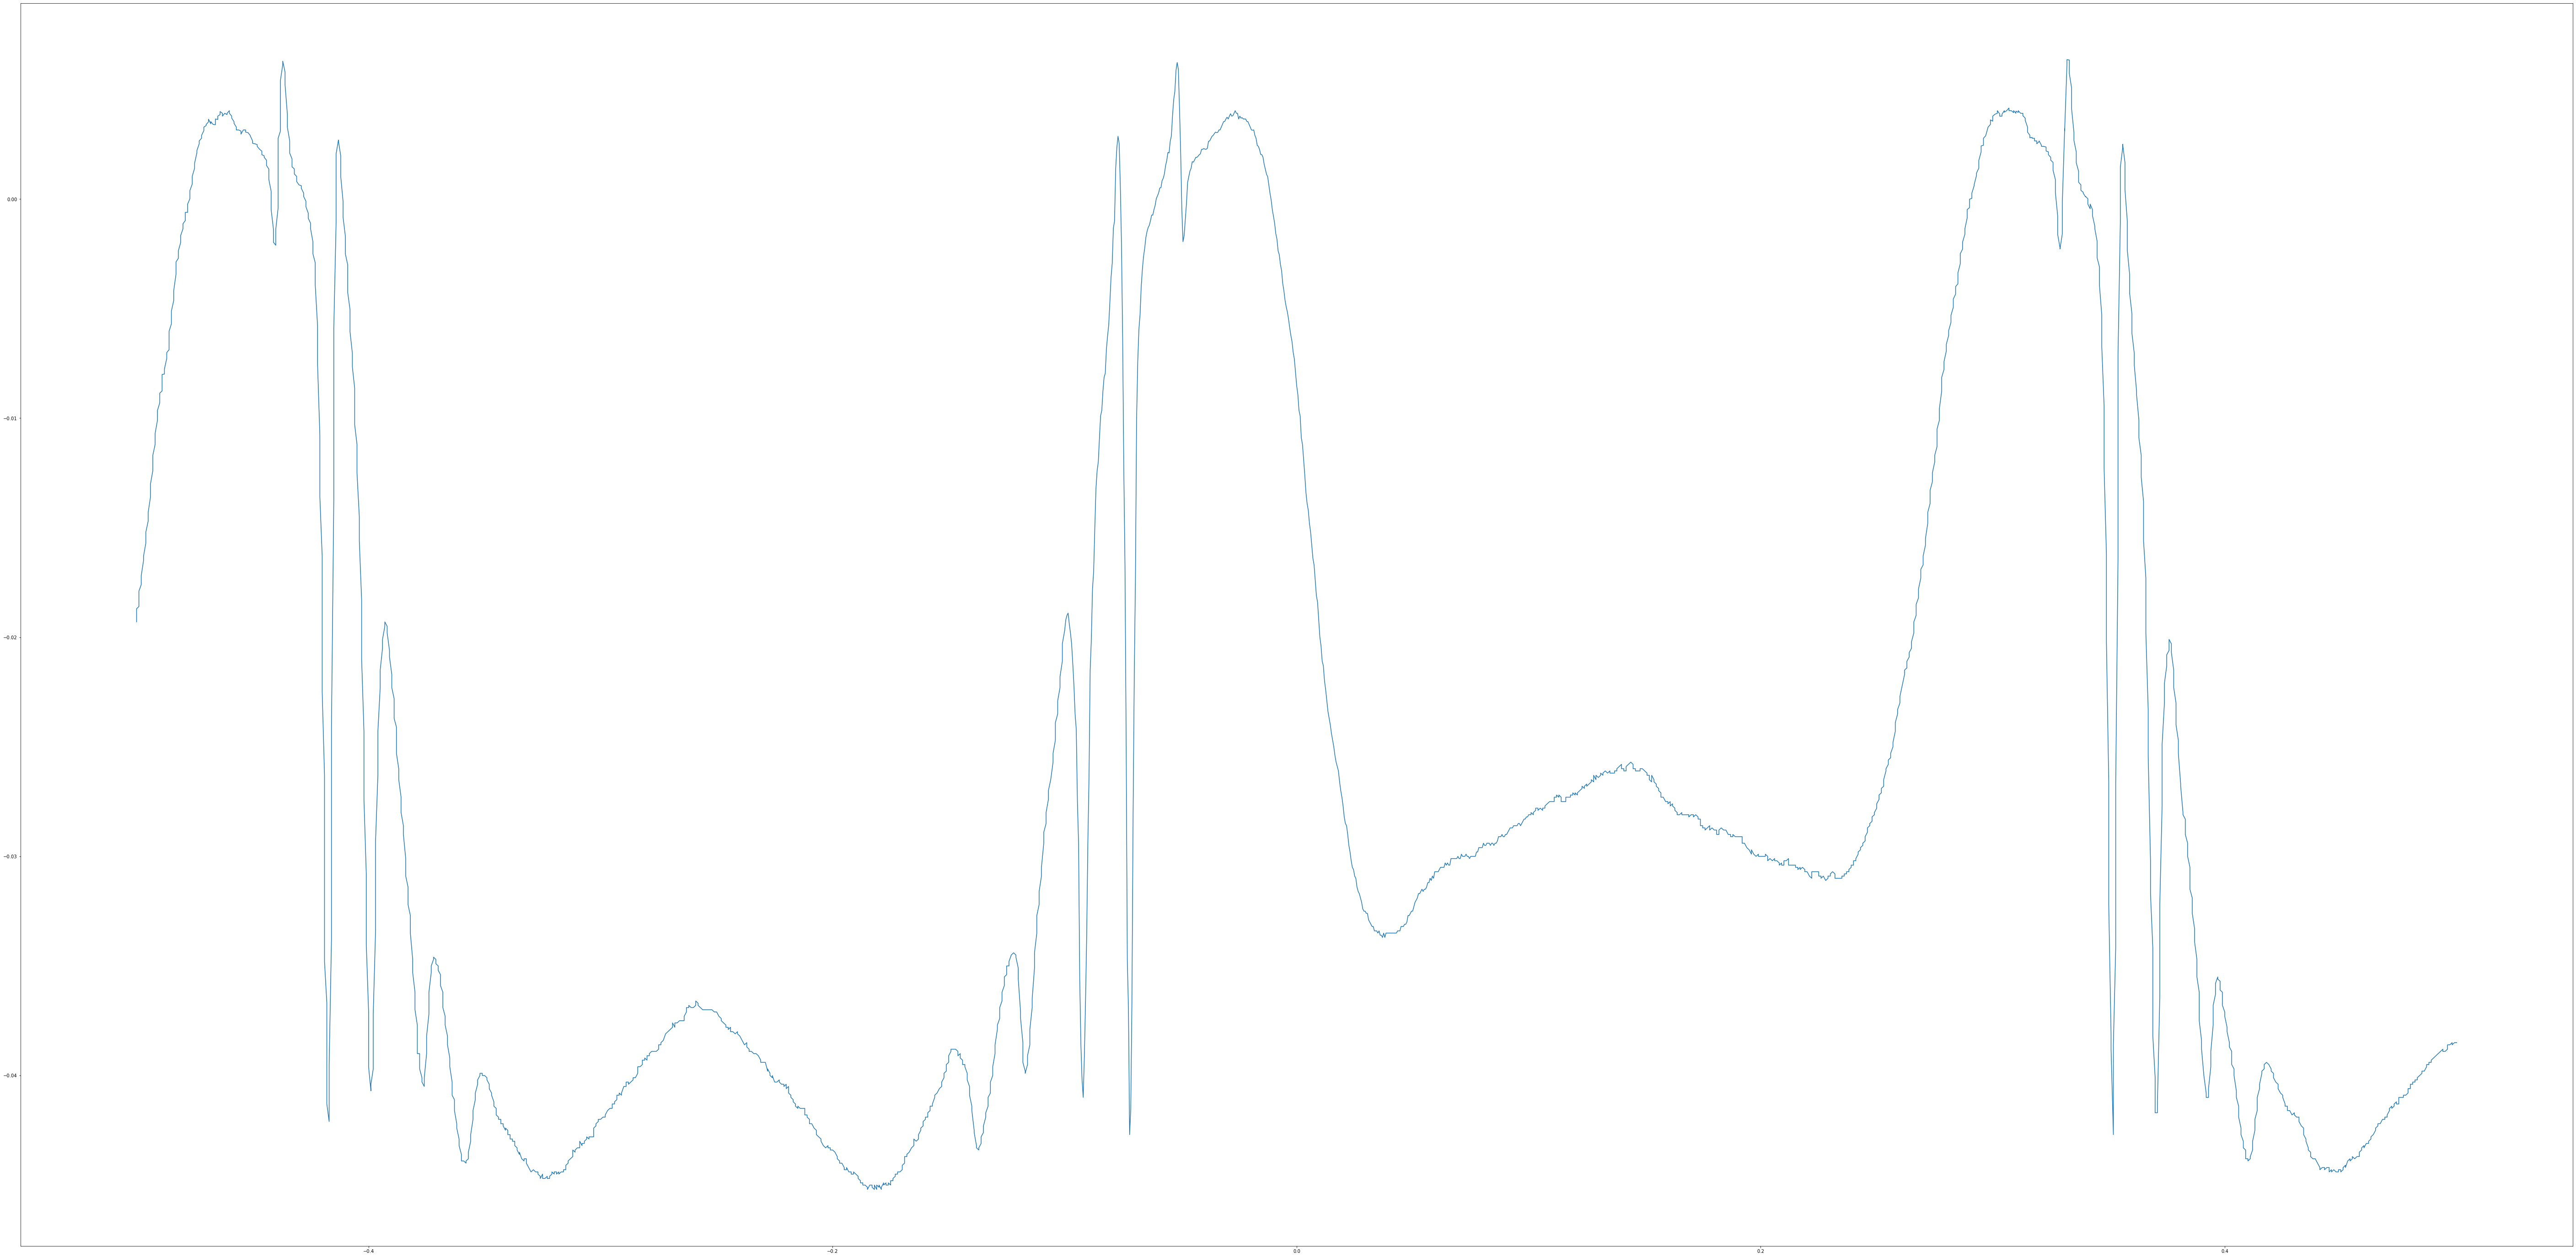

In [3]:
fig,ax = plt.subplots(1,1,figsize= (100,50))
plt.plot(data[:,0], data[:,4])
plt.show()

## Low Pass filtering

In [4]:
dt = (data[2,0]-data[0,0])/2
fc = 200
alpha = 2*np.pi*dt*fc/(2*np.pi*dt*fc+1)

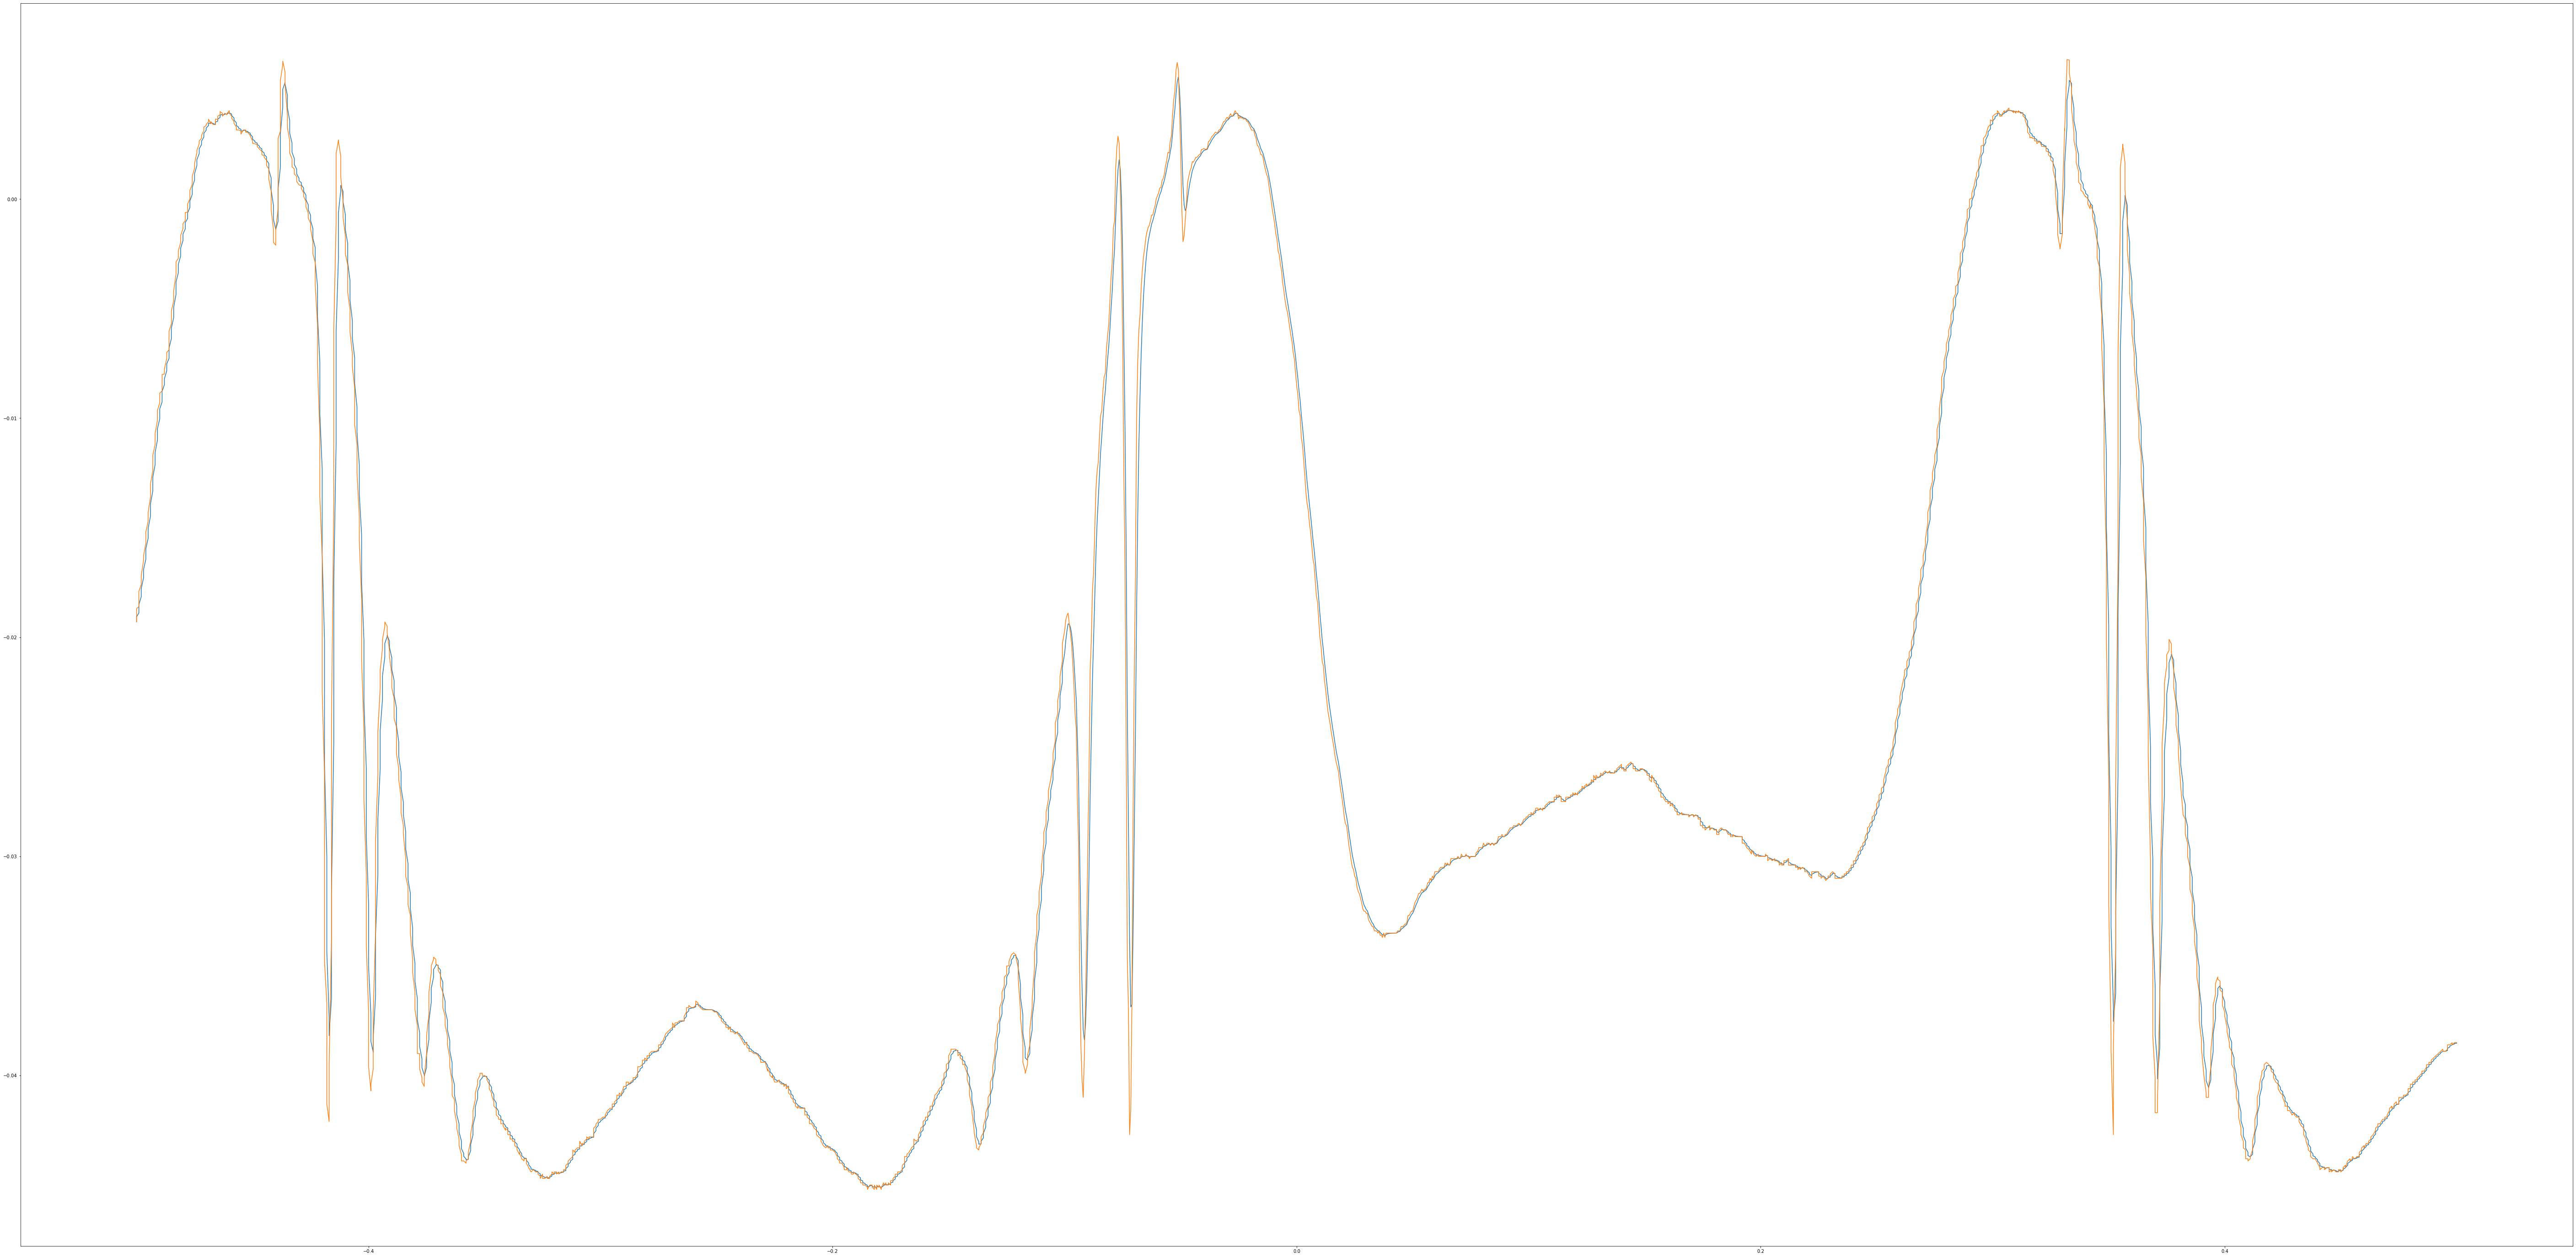

In [5]:
y = [data[0,4]]
for i in data[:,4]:
    y_t = alpha*i + (1.0-alpha)*y[-1]
    y.append(y_t)
fig,ax = plt.subplots(1,1,figsize= (100,50))
plt.plot(data[:,0], y[1:], label = 'filtered LP')
plt.plot(data[:,0], data[:,4], label = 'original')
plt.show()

## High Pass filtering

In [6]:
dt = (data[2,0]-data[0,0])/2
fc_hp = 100
alpha_hp = 1/(2*np.pi*dt*fc_hp+1)

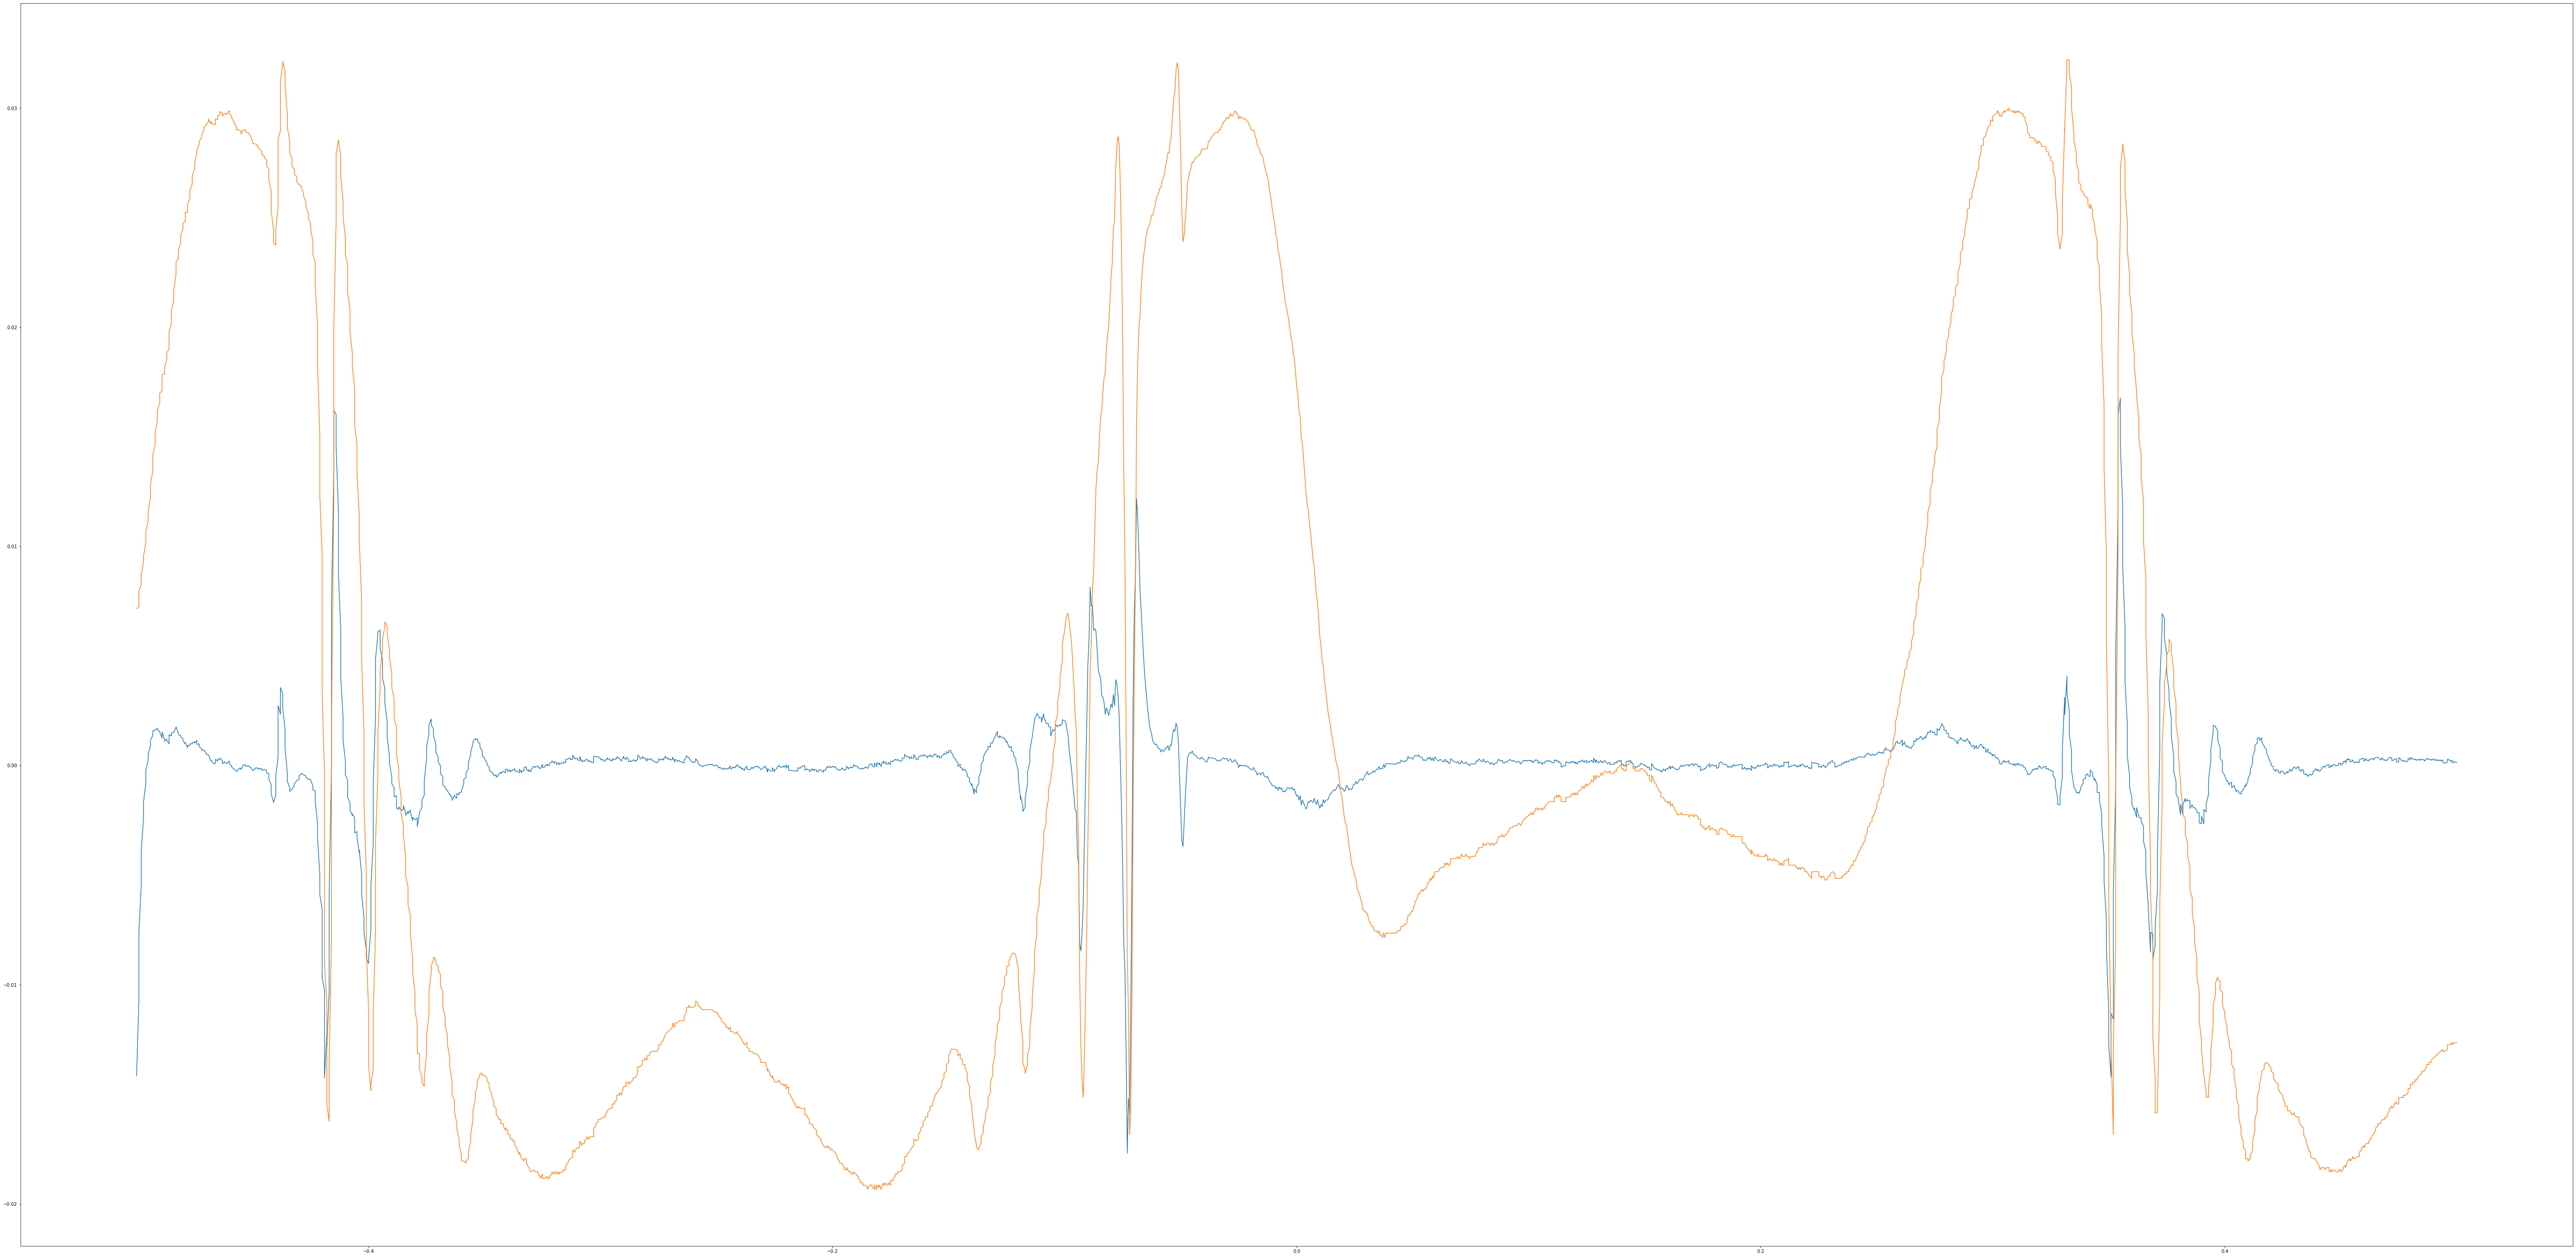

In [7]:
y_hp = [data[0,4]]
for i in range(1,len(data[:,4])):
    y_t = alpha_hp*(y_hp[-1] + data[i,4] - data[i-1,4])
    y_hp.append(y_t)
fig,ax = plt.subplots(1,1,figsize= (100,50))
plt.plot(data[1:,0], y_hp[1:]-np.mean(y_hp[1:]), label = 'filtered HP')
plt.plot(data[1:,0], data[1:,4]-np.mean(data[1:,4]), label = 'original')
plt.show()

## Averaging Low Pass together

In [8]:
dt = (data[2,0]-data[0,0])/2
fc = 150
alpha = 2*np.pi*dt*fc/(2*np.pi*dt*fc+1)

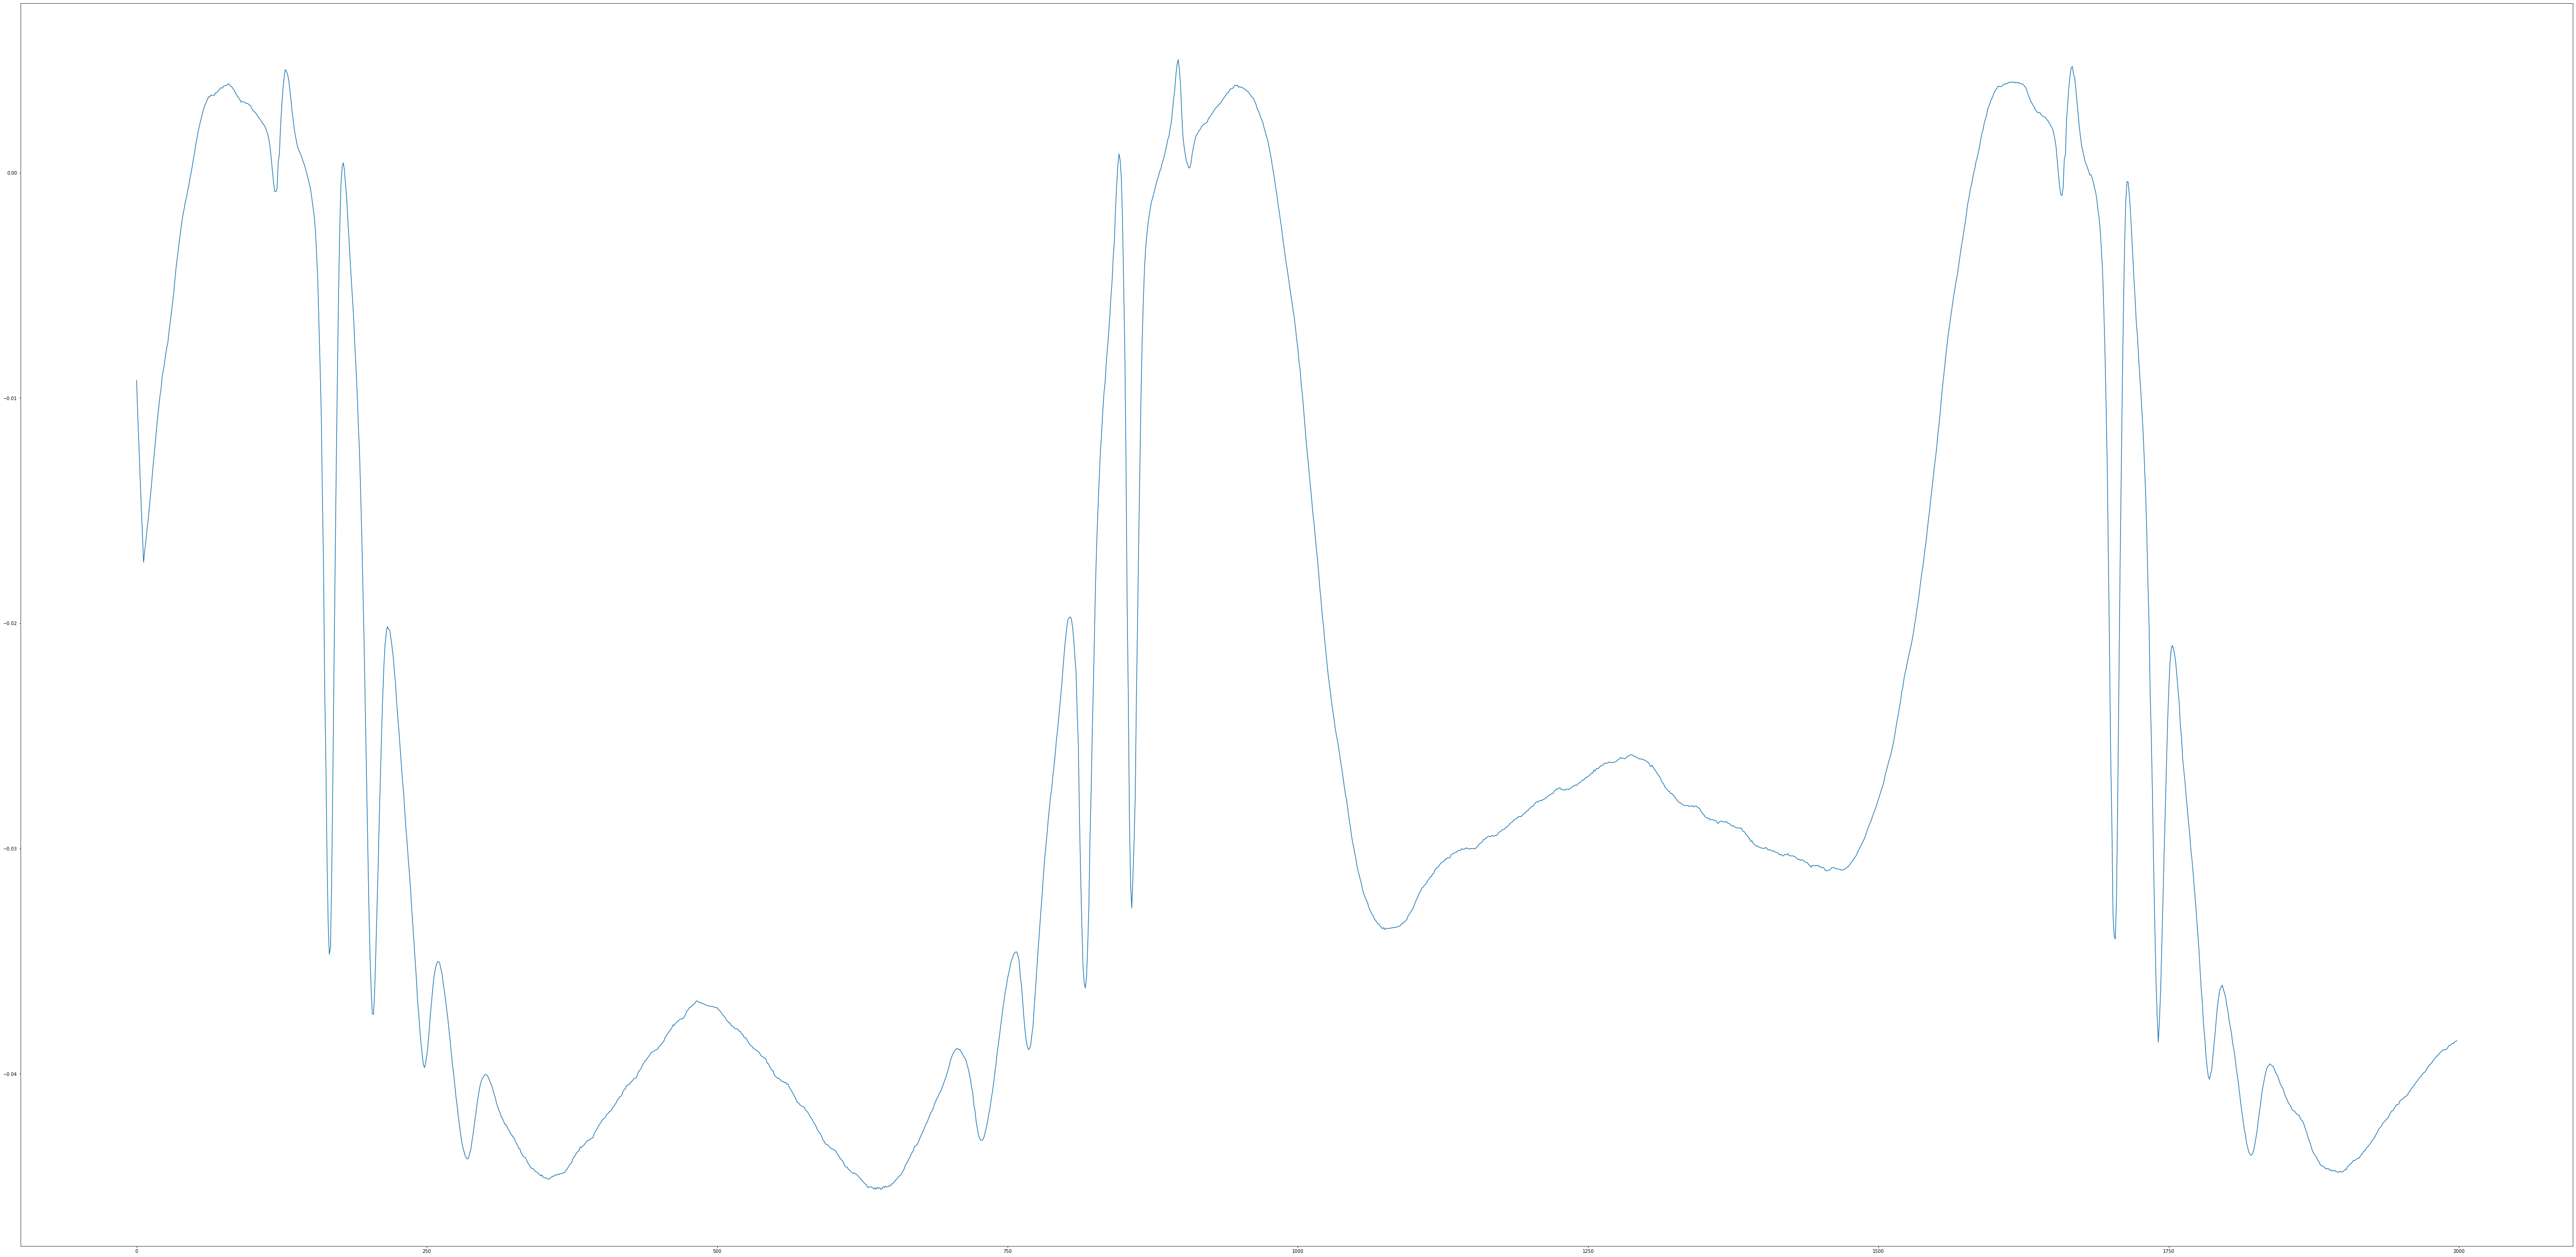

In [12]:
y_avg = []
avg_filter = [0]*8
y = [data[0,4]]
for i in data[:,4]:
    avg_filter.pop(0)
    avg_filter.append(i)
#     y_avg.append(np.average(avg_filter))
#     y_t = alpha*i + (1.0-alpha)*y_avg[-1]
#     y_avg.append(y_t)
    y_prev = np.average(avg_filter)
    y_t = alpha*i + (1.0-alpha)*y_prev
    y_avg.append(y_t)
fig,ax = plt.subplots(1,1,figsize= (100,50))
plt.plot(y_avg[1:], label = 'filtered LP')
# plt.plot(data[:,4], label = 'original')
plt.show()

In [10]:
0.9/(1-0.9)/2/np.pi/dt

2864.7889756541144